In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error#, mean_squared_error


# Q1. Normal Equation

In [3]:
X = np.array([[1,6,4,11],[1,8,5,15],[1,12,9,25],[1,2,1,3]])
y = np.array([20,30,50,7])

w = np.linalg.inv(X.T@X)@X.T@y

print(w)

[ 4.  -5.5 -7.   7. ]


# Q2 Loss Functions:

We implement linear regrssion with MAE as loss function below.

- The MAE for a set of predictions $ \hat{Y} $ and true values $ Y $ is defined as:
  $$  \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |\hat{y}_i - y_i|  $$

- The absolute value function $ |x| $ is not differentiable at $ x = 0 $.

- At non-differentiable points, a subgradient can be used. For the absolute value function, the subgradient is:
  $$
  \frac{\partial |x|}{\partial x} =
  \begin{cases}
  1 & \text{if } x > 0 \\
  -1 & \text{if } x < 0 \\
  \text{any value in } [-1, 1] & \text{if } x = 0
  \end{cases}
  $$

- In practice, we use the sign function as shown below:
     $$
     \text{sign}(x) =
     \begin{cases}
     1 & \text{if } x > 0 \\
     -1 & \text{if } x < 0 \\
     0 & \text{if } x = 0
     \end{cases}
     $$

- This sign function acts as a "pseudo-gradient" for the absolute value. It's a simple way to guide the optimization process, even though it doesn't provide an exact derivative at $ x = 0 $.


In the context of gradient descent for minimizing MAE, you can update parameters using this pseudo-gradient:

- Compute the error: $ \text{error}_i = \hat{y}_i - y_i $
- Use the sign of the error for updates:
  $
  \text{update} \propto -\text{sign}(\text{error})
  $



Weights (including intercept): [-0.00116667  0.2       ]


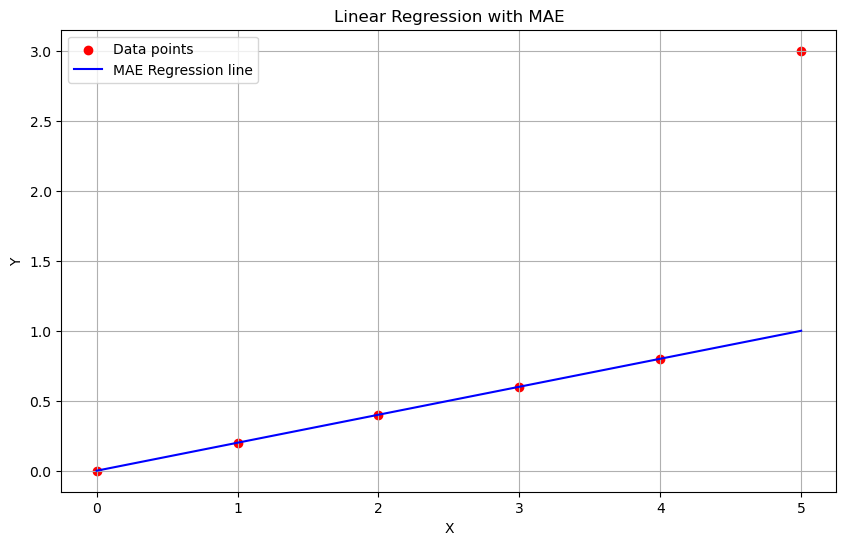

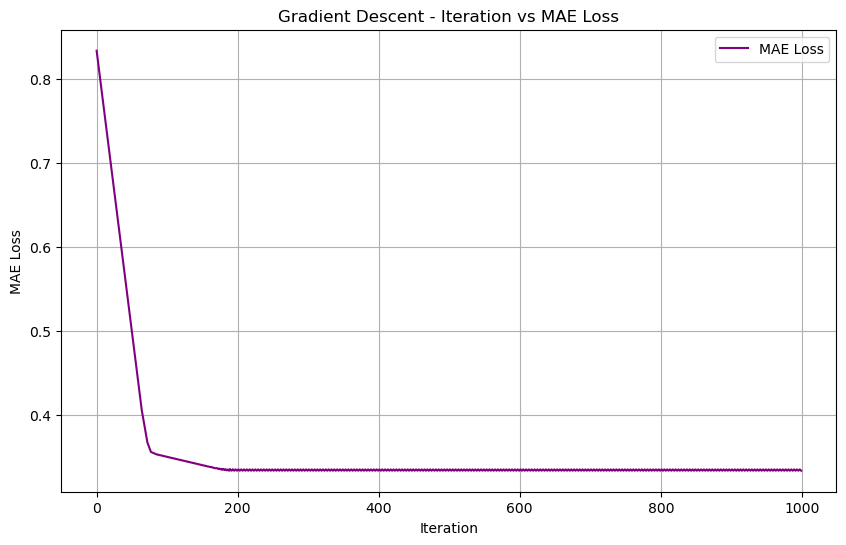

In [4]:
def gradient_descent_mae(X, Y, num_iterations=1000, learning_rate=0.001):
    n, m = X.shape
    # Add a column of ones to X to account for the intercept in the weight vector
    X = np.column_stack((np.ones(n), X))
    weights = np.zeros(m + 1)  # Initialize weights (including intercept)
    loss_history = []

    for _ in range(num_iterations):
        Y_pred = X.dot(weights)
        errors = Y - Y_pred

        # Calculate MAE and store it
        mae_loss = np.mean(np.abs(errors))
        loss_history.append(mae_loss)

        # Update weights with pseudo-gradient of MAE
        gradient = -np.sum(np.sign(errors).reshape(-1, 1) * X, axis=0) / n
        weights -= learning_rate * gradient
    return weights, loss_history

# Define the dataset with a few points and one or two outliers
X = np.array([0, 1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([0, 0.2, 0.4, 0.6, 0.8, 3])  # Last point is an outlier

# Perform gradient descent with MAE
weights, loss_history = gradient_descent_mae(X, Y, num_iterations=1000, learning_rate=0.001)

# Print final weights
print("Weights (including intercept):", weights)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='red', label='Data points')

# Generate a line from the model
X_fit = np.linspace(0, 5, 100).reshape(-1, 1)
X_fit_bias = np.column_stack((np.ones(X_fit.shape[0]), X_fit))
Y_fit = X_fit_bias.dot(weights)

plt.plot(X_fit, Y_fit, color='blue', label='MAE Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with MAE')
plt.legend()
plt.grid(True)
plt.show()

# Plot iteration vs MAE loss
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_history)), loss_history, color='purple', label='MAE Loss')
plt.xlabel('Iteration')
plt.ylabel('MAE Loss')
plt.title('Gradient Descent - Iteration vs MAE Loss')
plt.grid(True)
plt.legend()
plt.show()

Weights (including intercept): [-0.11532097  0.41085644]


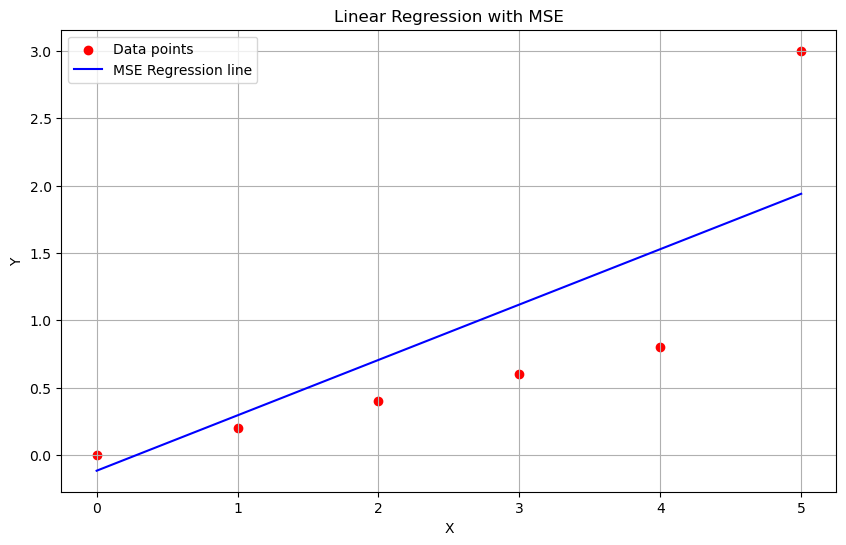

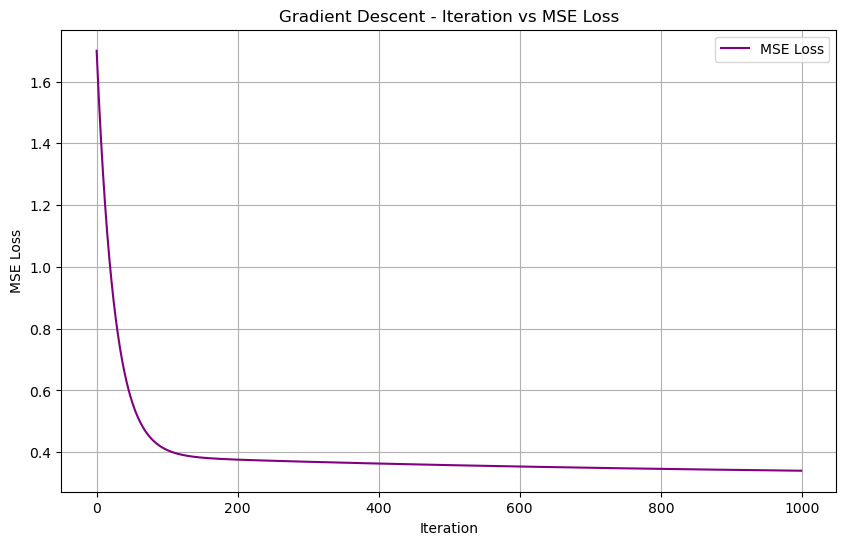

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent_mse(X, Y, num_iterations=1000, learning_rate=0.001):
    n, m = X.shape
    # Add a column of ones to X to account for the intercept in the weight vector
    X = np.column_stack((np.ones(n), X))
    weights = np.zeros(m + 1)  # Initialize weights (including intercept)
    loss_history = []

    for _ in range(num_iterations):
        Y_pred = X.dot(weights)
        errors = Y - Y_pred

        # Calculate MSE and store it
        mse_loss = np.mean(errors**2)
        loss_history.append(mse_loss)

        # Update weights with gradient of MSE
        gradient = -2 * X.T.dot(errors) / n
        weights -= learning_rate * gradient

    return weights, loss_history

# Define the dataset with a few points and one or two outliers
X = np.array([0, 1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([0, 0.2, 0.4, 0.6, 0.8, 3])  # Last point is an outlier

# Perform gradient descent with MSE
weights, loss_history = gradient_descent_mse(X, Y, num_iterations=1000, learning_rate=0.001)

# Print final weights
print("Weights (including intercept):", weights)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='red', label='Data points')

# Generate a line from the model
X_fit = np.linspace(0, 5, 100).reshape(-1, 1)
X_fit_bias = np.column_stack((np.ones(X_fit.shape[0]), X_fit))
Y_fit = X_fit_bias.dot(weights)

plt.plot(X_fit, Y_fit, color='blue', label='MSE Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with MSE')
plt.legend()
plt.grid(True)
plt.show()

# Plot iteration vs MSE loss
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_history)), loss_history, color='purple', label='MSE Loss')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Gradient Descent - Iteration vs MSE Loss')
plt.grid(True)
plt.legend()
plt.show()

Weights (including intercept): [-0.00089127  0.35867052]


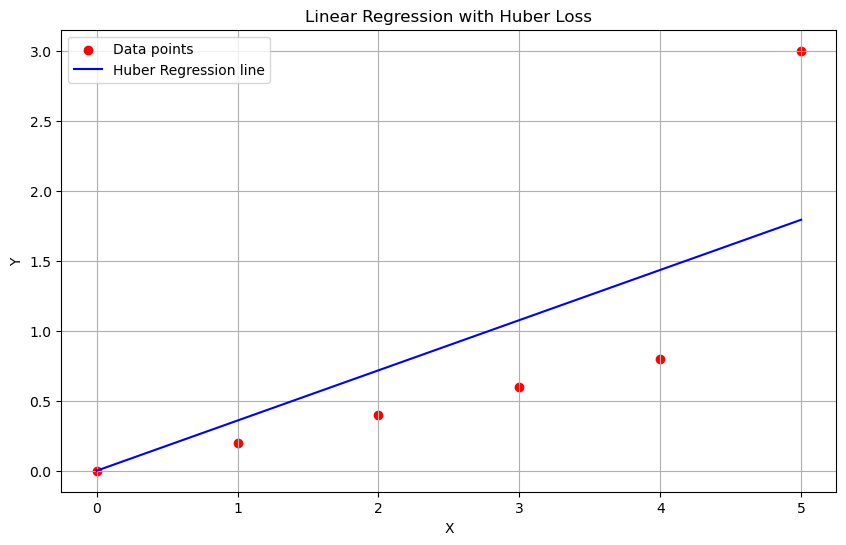

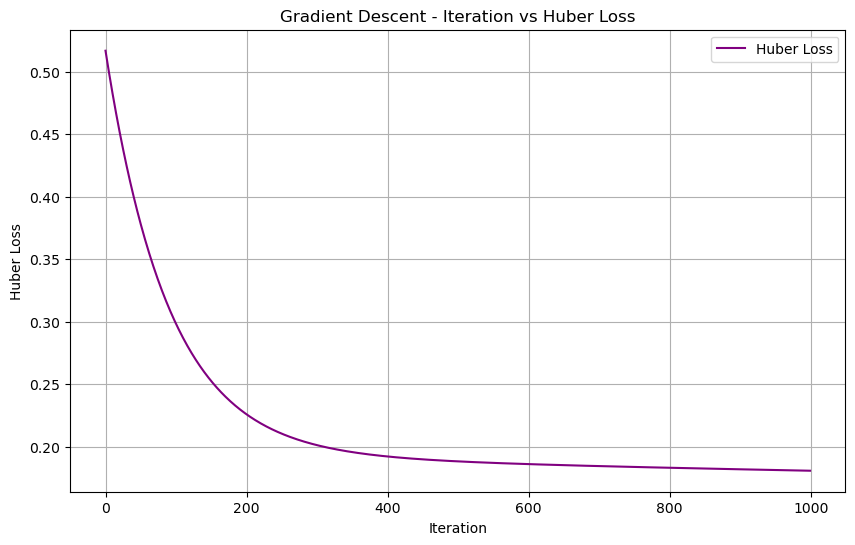

In [6]:
#Large value of delta simulates the behavior of MSE
#small value of delta simulates the behavior of MAE (delta = 0.1 for the above dataset)
def gradient_descent_huber(X, Y, delta=0.01, num_iterations=1000, learning_rate=0.001):
    n, m = X.shape
    # Add a column of ones to X to account for the intercept in the weight vector
    X = np.column_stack((np.ones(n), X))
    weights = np.zeros(m + 1)  # Initialize weights (including intercept)
    loss_history = []

    for _ in range(num_iterations):
        Y_pred = X.dot(weights)
        errors = Y - Y_pred

        # Calculate Huber loss and store it
        is_small_error = np.abs(errors) <= delta
        squared_loss = 0.5 * errors**2
        linear_loss = delta * (np.abs(errors) - 0.5 * delta)
        huber_loss = np.where(is_small_error, squared_loss, linear_loss)

        loss_history.append(np.mean(huber_loss))

        # Calculate gradient for Huber loss
        gradient = np.where(is_small_error, -errors, -delta * np.sign(errors))
        gradient = X.T.dot(gradient) / n
        weights -= learning_rate * gradient

    return weights, loss_history

# Define the dataset with a few points and one or two outliers
X = np.array([0, 1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([0, 0.2, 0.4, 0.6, 0.8, 3])  # Last point is an outlier

# Perform gradient descent with Huber loss
weights, loss_history = gradient_descent_huber(X.reshape(-1, 1), Y, delta=1, num_iterations=1000, learning_rate=0.001)

# Print final weights
print("Weights (including intercept):", weights)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='red', label='Data points')

# Generate a line from the model
X_fit = np.linspace(0, 5, 100).reshape(-1, 1)
X_fit_bias = np.column_stack((np.ones(X_fit.shape[0]), X_fit))
Y_fit = X_fit_bias.dot(weights)

plt.plot(X_fit, Y_fit, color='blue', label='Huber Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Huber Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot iteration vs Huber loss
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_history)), loss_history, color='purple', label='Huber Loss')
plt.xlabel('Iteration')
plt.ylabel('Huber Loss')
plt.title('Gradient Descent - Iteration vs Huber Loss')
plt.grid(True)
plt.legend()
plt.show()

Weights (including intercept): [0.00402851 0.34488553]


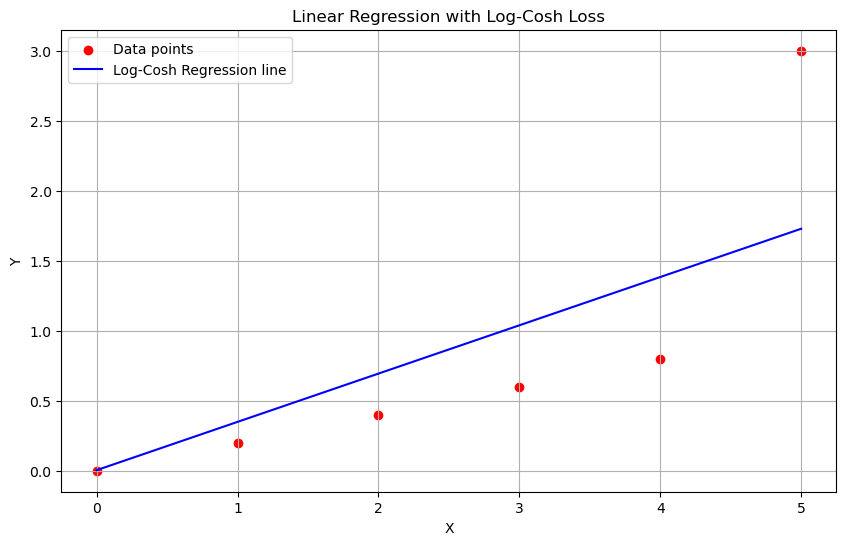

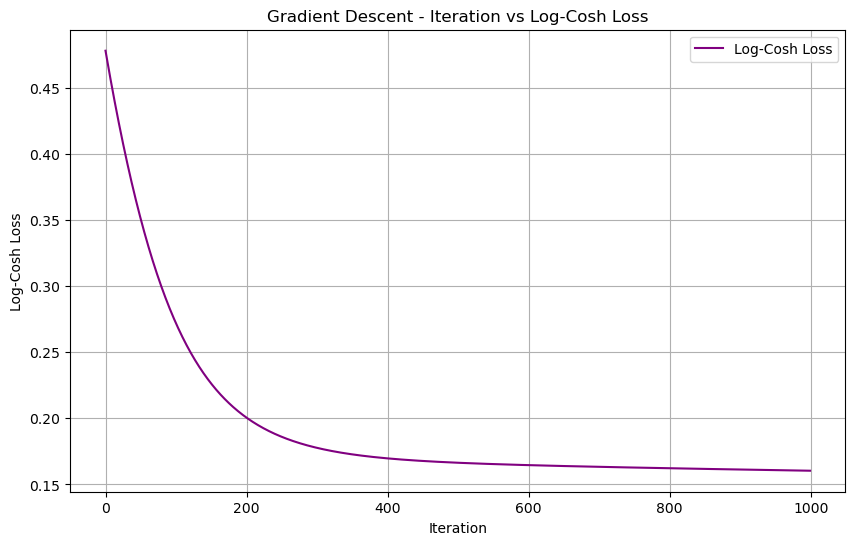

In [7]:
def gradient_descent_logcosh(X, Y, num_iterations=1000, learning_rate=0.001):
    n, m = X.shape
    # Add a column of ones to X to account for the intercept in the weight vector
    X = np.column_stack((np.ones(n), X))
    weights = np.zeros(m + 1)  # Initialize weights (including intercept)
    loss_history = []

    for _ in range(num_iterations):
        Y_pred = X.dot(weights)
        errors = Y_pred - Y

        # Calculate Log-Cosh loss and store it
        logcosh_loss = np.log(np.cosh(errors))
        loss_history.append(np.mean(logcosh_loss))

        # Calculate gradient for Log-Cosh loss
        gradient = X.T.dot(np.tanh(errors)) / n
        weights -= learning_rate * gradient

    return weights, loss_history

# Define the dataset with a few points and one or two outliers
X = np.array([0, 1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([0, 0.2, 0.4, 0.6, 0.8, 3])  # Last point is an outlier

# Perform gradient descent with Log-Cosh loss
weights, loss_history = gradient_descent_logcosh(X, Y, num_iterations=1000, learning_rate=0.001)

# Print final weights
print("Weights (including intercept):", weights)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='red', label='Data points')

# Generate a line from the model
X_fit = np.linspace(0, 5, 100).reshape(-1, 1)
X_fit_bias = np.column_stack((np.ones(X_fit.shape[0]), X_fit))
Y_fit = X_fit_bias.dot(weights)

plt.plot(X_fit, Y_fit, color='blue', label='Log-Cosh Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Log-Cosh Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot iteration vs Log-Cosh loss
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_history)), loss_history, color='purple', label='Log-Cosh Loss')
plt.xlabel('Iteration')
plt.ylabel('Log-Cosh Loss')
plt.title('Gradient Descent - Iteration vs Log-Cosh Loss')
plt.grid(True)
plt.legend()
plt.show()

# Q4: Multiclass Logistic Regression

In [9]:
def softmax(Z):
    # Each column of Z corresponds to a data instance
    #np.max(Z, axis=0) finds the maximum value in each column (for each data instance)
    # Z- np.max(Z, axis=0): Subtract the maximum value from each element in the respective column for numerical stability
    #exp_Z = np.exp(Z- np.max(Z, axis=0)): Applies the exponential function element-wise to the stabilized values
    exp_Z = np.exp(Z- np.max(Z, axis=0) ) 
    #np.sum(exp_Z, axis=0) sums the exponentials along each column (for each data instance)
    #print("sum of each column")
    #print(np.sum(exp_Z, axis=0))
    return exp_Z / np.sum(exp_Z, axis=0)

w_cat = np.array([4.2, -0.01, -0.12])
w_horse = np.array([-20, -0.08, 35])
w_elephant = np.array([-1250, 0.82, 0.9])
W = np.array([w_cat, w_horse, w_elephant])

print("The weight matrix is:")
print(W)

X = np.array([[1, 4.2, 0.4], [1, 720, 2.4], [1, 2350, 5.5]])
print("The data matrix is:")
print(X)

# Calculate the Z matrix
# Each column corresponds to a data point
# For example, first column contains w_1.x_1, w_2.x_1, and w_3.x_1, where "." indicates inner product
Z = np.dot(W, X.T)
print("Z matrix:")
print(Z)

# Applying the softmax function to the entire matrix Z
Q = softmax(Z)
print("Softmax matrix Q:")
print(Q)

# Check if each column of Q sums to 1
column_sums = np.sum(Q, axis=0)
print("Sum of each column in Q:")
print(column_sums)

The weight matrix is:
[[ 4.20e+00 -1.00e-02 -1.20e-01]
 [-2.00e+01 -8.00e-02  3.50e+01]
 [-1.25e+03  8.20e-01  9.00e-01]]
The data matrix is:
[[1.00e+00 4.20e+00 4.00e-01]
 [1.00e+00 7.20e+02 2.40e+00]
 [1.00e+00 2.35e+03 5.50e+00]]
Z matrix:
[[    4.11     -3.288   -19.96 ]
 [   -6.336     6.4     -15.5  ]
 [-1246.196  -657.44    681.95 ]]
sum of each column
[1.00002906 1.00006202 1.        ]
Softmax matrix Q:
[[9.99970937e-001 6.20194805e-005 1.46002471e-305]
 [2.90634536e-005 9.99937981e-001 1.26273901e-303]
 [0.00000000e+000 4.98797419e-289 1.00000000e+000]]
Sum of each column in Q:
[1. 1. 1.]
